In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Project

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [3]:
df = pd.read_csv('datasets/loan_data.csv')

# Data Explority

In [4]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [7]:
df['purpose_code'], unique = pd.factorize(df['purpose'])

In [8]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  purpose_code  
0            0        0               0             0  
1            0        0               0             1  
2            0        0               0             0  
3            0        0               0             0  
4            1        0               0             1

In [9]:
df.tail()

credit.policy             purpose  int.rate  installment  \
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  purpose_code  
9573               2            0        0               1             2  
9574               5            0        0               1             2  
9575               8            0        0               1             0  
9576               5            0        0               1             3  
9577               6            0        0               1             0

In [10]:
unique

Index(['debt_consolidation', 'credit_card', 'all_other', 'home_improvement',
       'small_business', 'major_purchase', 'educational'],
      dtype='object')

In [21]:
map_code_purpose = {code:purpose for code , purpose in enumerate(unique)}
map_code_purpose

{0: 'debt_consolidation',
 1: 'credit_card',
 2: 'all_other',
 3: 'home_improvement',
 4: 'small_business',
 5: 'major_purchase',
 6: 'educational'}

In [22]:
list_code_purpose = list(enumerate(unique))
list_code_purpose

[(0, 'debt_consolidation'),
 (1, 'credit_card'),
 (2, 'all_other'),
 (3, 'home_improvement'),
 (4, 'small_business'),
 (5, 'major_purchase'),
 (6, 'educational')]

<Axes: xlabel='purpose', ylabel='count'>

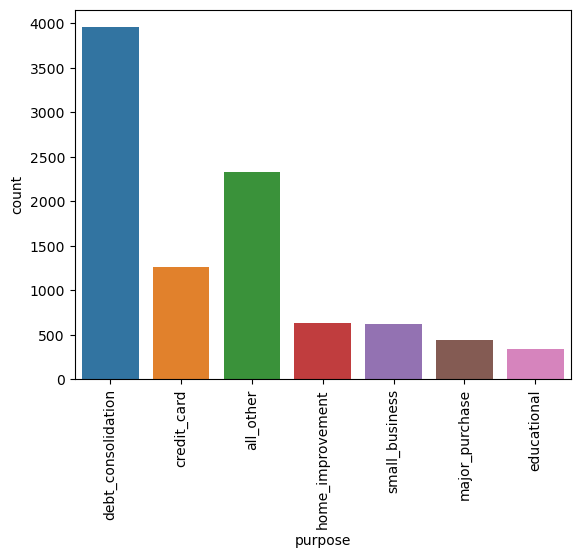

In [26]:
plt.xticks(rotation=90)
sns.countplot(data=df,x='purpose')

/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset 

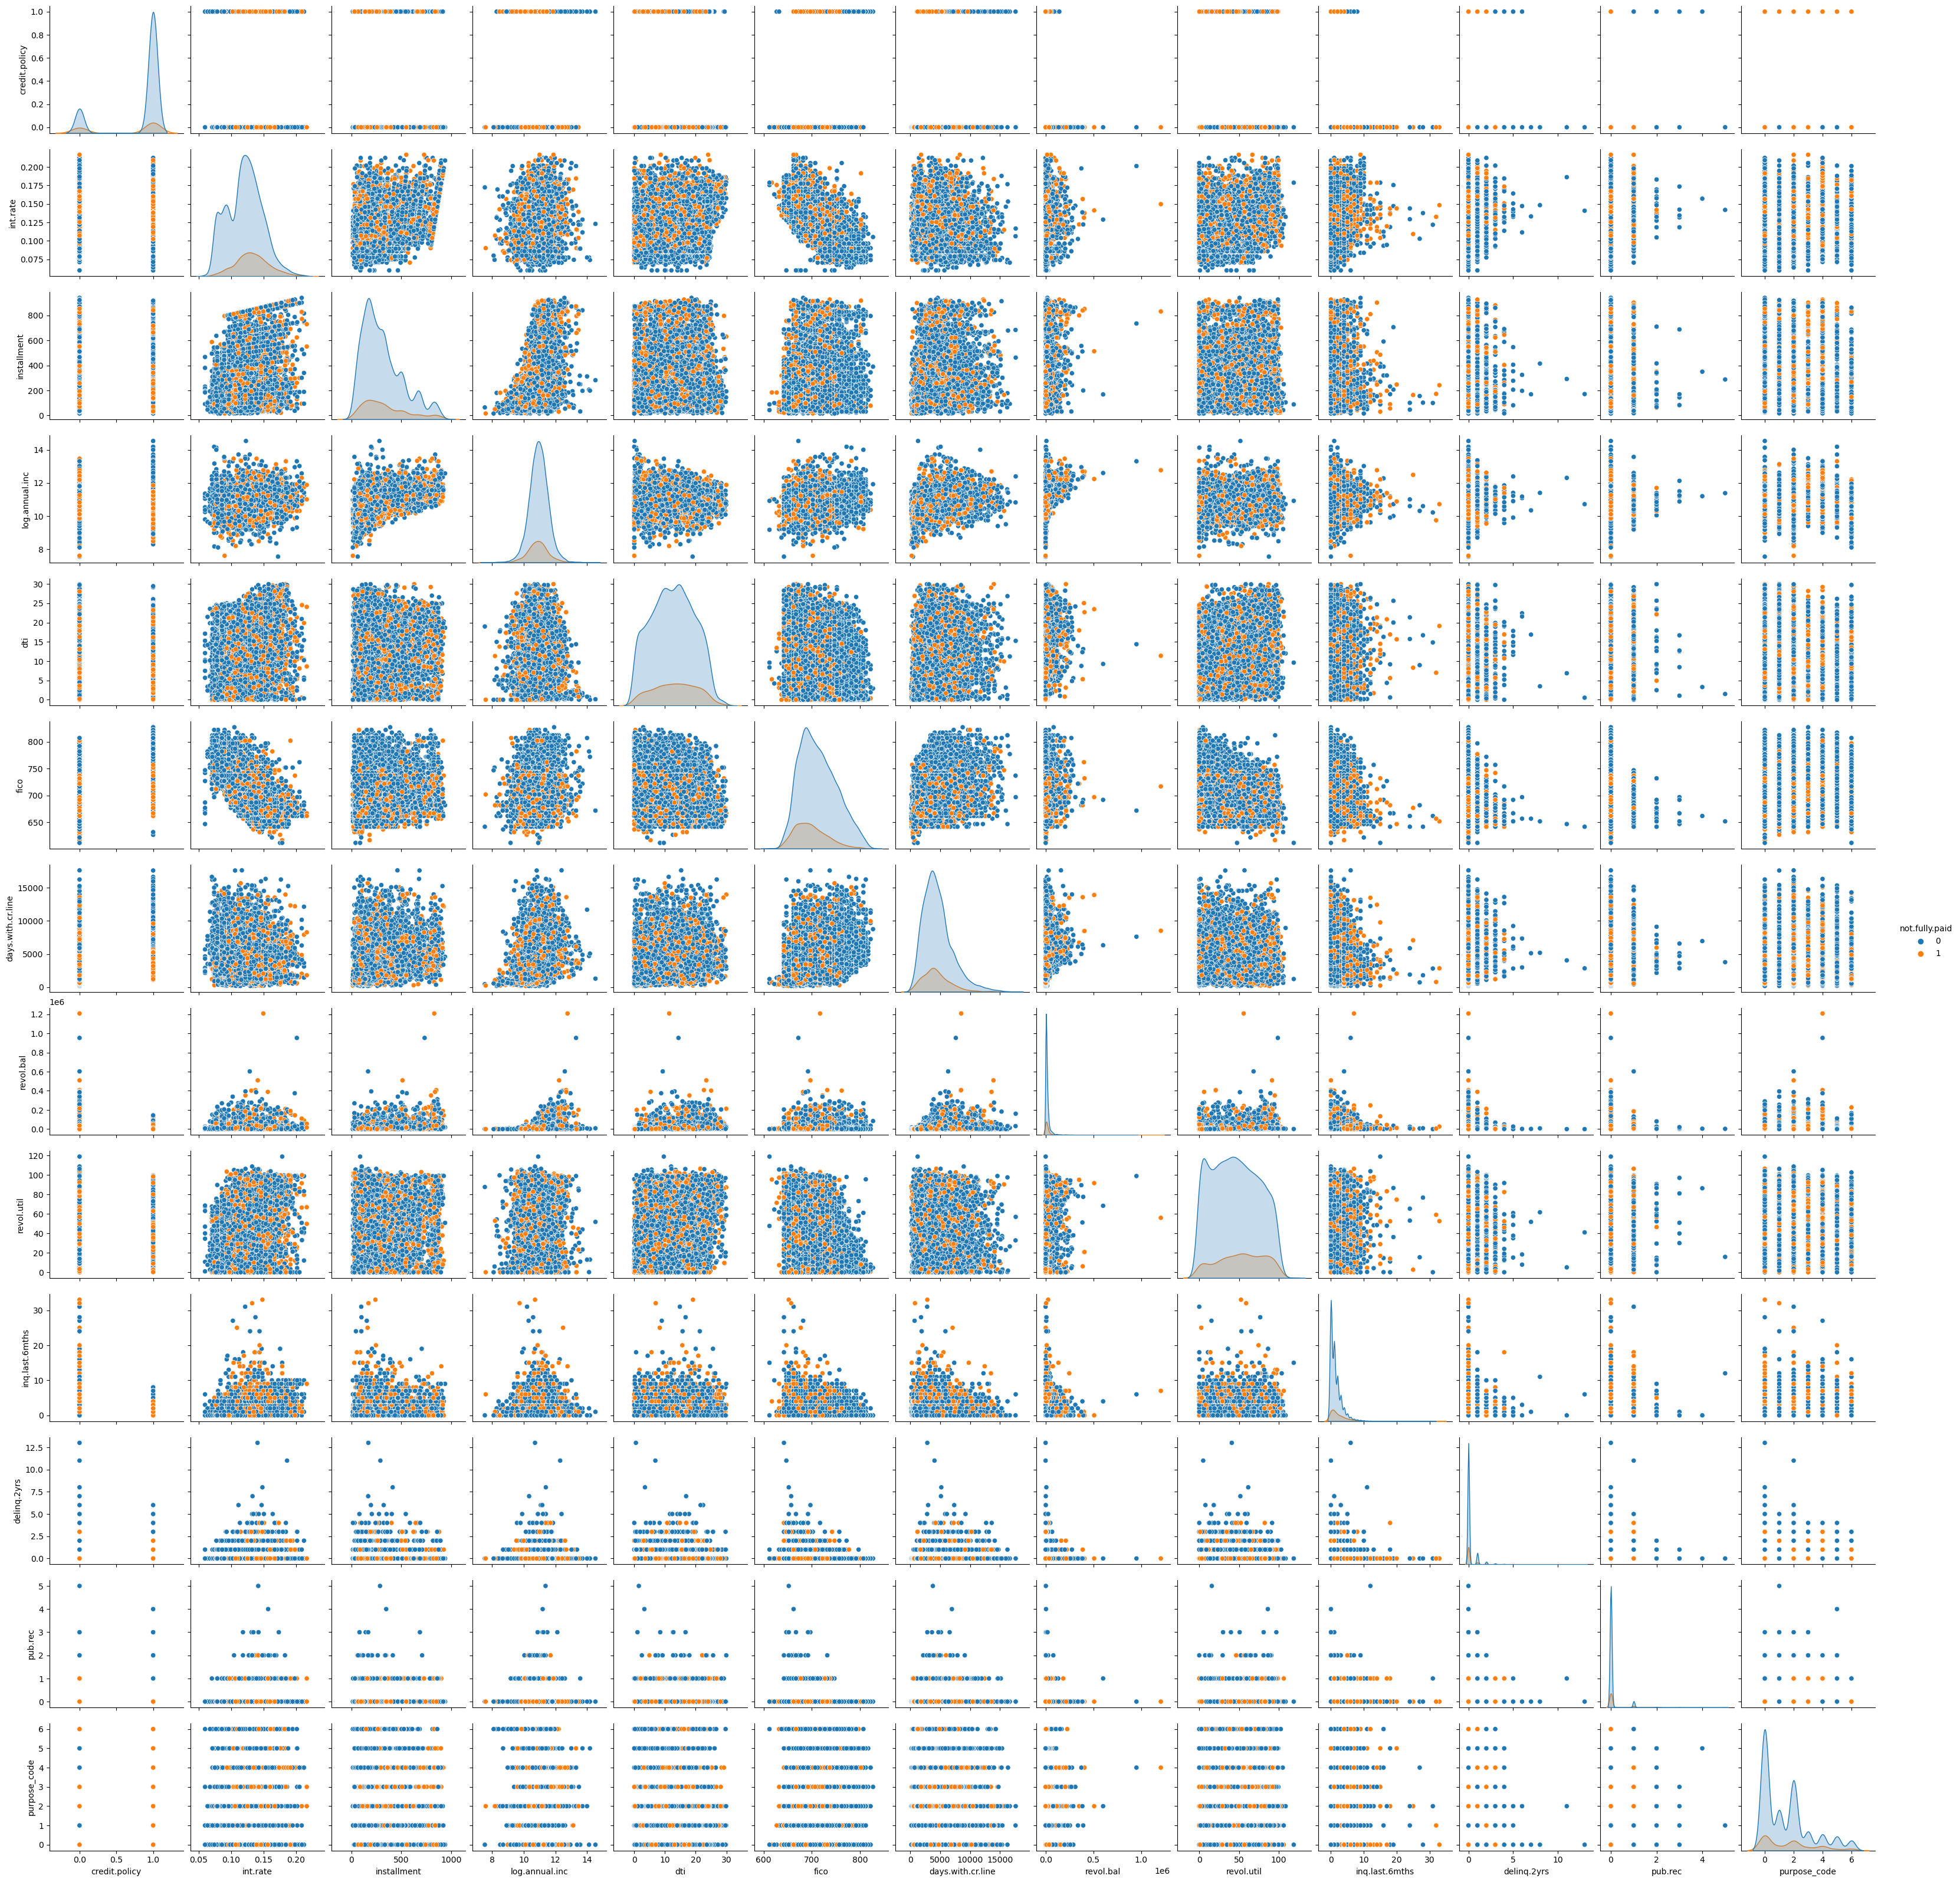

In [27]:
sns.pairplot(data=df, hue='not.fully.paid')

/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='int.rate', ylabel='Count'>

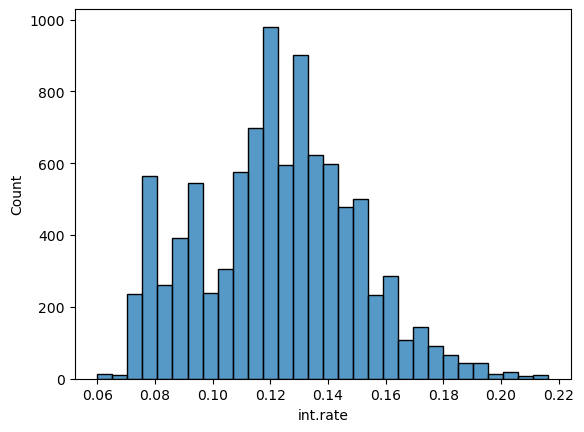

In [30]:
sns.histplot(df['int.rate'], bins=30)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

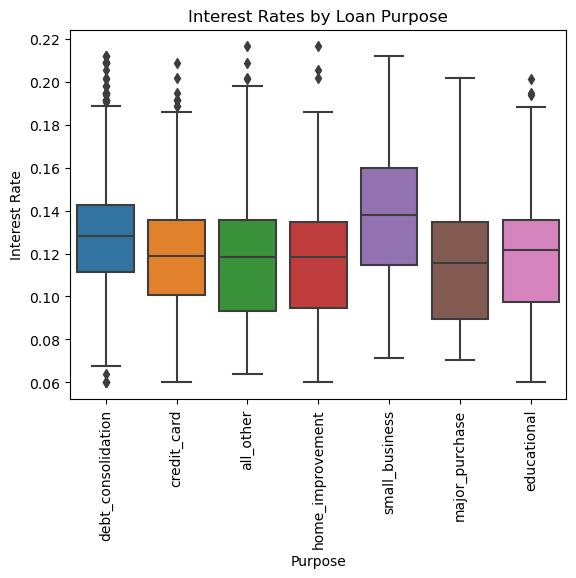

In [32]:
sns.boxplot(x='purpose', y='int.rate', data=df)
plt.title('Interest Rates by Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)


In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['purpose','not.fully.paid'], axis=1)
Y = df['not.fully.paid']

In [40]:
X.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  purpose_code  
0        0             0  
1        0             1  
2        0             0  
3        0             0  
4        0             1

In [41]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [42]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  purpose_code  
0            0        0               0             0  
1            0        0               0             1  
2            0        0               0             0  
3            0        0               0             0  
4            1        0               0             1

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Machine Learning

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtmd= DecisionTreeClassifier()

In [44]:
dtmd.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
prediction_dtmd = dtmd.predict(X_test)

## Evaluation Desicion tree


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
confusion_matrix(y_pred=prediction_dtmd, y_true=y_test)

array([[2206,  444],
       [ 394,  117]])

In [49]:
print(classification_report(y_pred=prediction_dtmd, y_true=y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2650
           1       0.21      0.23      0.22       511

    accuracy                           0.73      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.73      0.74      3161



In [50]:
# Identify outliers in 'debt_consolidation' category
debt_consolidation_outliers = df[(df['purpose'] == 'debt_consolidation') & 
                                 ((df['int.rate'] < df['int.rate'].quantile(0.25) - 1.5 * (df['int.rate'].quantile(0.75) - df['int.rate'].quantile(0.25))) | 
                                  (df['int.rate'] > df['int.rate'].quantile(0.75) + 1.5 * (df['int.rate'].quantile(0.75) - df['int.rate'].quantile(0.25))))]

In [51]:
debt_consolidation_outliers

credit.policy             purpose  int.rate  installment  \
5336              1  debt_consolidation    0.1982       556.10   
5540              1  debt_consolidation    0.2086       827.33   
5679              1  debt_consolidation    0.2121       746.24   
6517              1  debt_consolidation    0.2121       816.14   
7313              1  debt_consolidation    0.2090       771.28   
8931              0  debt_consolidation    0.2011       260.53   
9208              0  debt_consolidation    0.1982       166.83   
9263              0  debt_consolidation    0.2017       745.01   
9281              0  debt_consolidation    0.2086       940.14   
9309              0  debt_consolidation    0.1982       926.83   
9337              0  debt_consolidation    0.2052       187.14   
9346              0  debt_consolidation    0.2121       340.06   
9409              0  debt_consolidation    0.2086       300.85   
9476              0  debt_consolidation    0.2090       526.73   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
5336       10.684646   5.22   667        1590.000000      12390        98.3   
5540       11.813030  12.78   672       10169.958330      62553        44.2   
5679       11.736069  19.87   662        7920.000000      90063        79.6   
6517       11.034890  15.45   667        3120.041667      10190        98.9   
7313       11.141862  24.52   662        3660.000000      16491        99.9   
8931       10.308953  10.44   667         540.041667       6402        80.0   
9208       10.858922  23.52   682        4289.958333       5444        37.3   
9263       12.388394   6.46   697        4199.958333      29182        97.9   
9281       12.569941  18.64   682        4589.958333      18406        50.8   
9309       11.587105  20.28   687        4320.958333      14858        99.1   
9337       12.089539   0.17   707        4233.958333        444        82.8   
9346       11.407565  10.24   682        1452.000000       6089        45.1   
9409       11.548534  17.12   667        8903.041667      53338        41.3   
9476       10.915088  13.81   662        4110.041667      13020        33.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  purpose_code  
5336               1            0        0               0             0  
5540               2            0        0               0             0  
5679               1            0        0               1             0  
6517               1            0        0               0             0  
7313               1            1        0               1             0  
8931               4            0        1               1             0  
9208              10            0        0               0             0  
9263               9            0        0               0             0  
9281               9            0        0               0             0  
9309               4            0        0               0             0  
9337              10            0        0               0             0  
9346              10            0        0               0             0  
9409               6            1        0               0             0  
9476               4            0        0               0             0

In [52]:
df_cleaned = df.drop(debt_consolidation_outliers.index)

In [53]:
df_cleaned.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  purpose_code  
0            0        0               0             0  
1            0        0               0             1  
2            0        0               0             0  
3            0        0               0             0  
4            1        0               0             1

In [54]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9564 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9564 non-null   int64  
 1   purpose            9564 non-null   object 
 2   int.rate           9564 non-null   float64
 3   installment        9564 non-null   float64
 4   log.annual.inc     9564 non-null   float64
 5   dti                9564 non-null   float64
 6   fico               9564 non-null   int64  
 7   days.with.cr.line  9564 non-null   float64
 8   revol.bal          9564 non-null   int64  
 9   revol.util         9564 non-null   float64
 10  inq.last.6mths     9564 non-null   int64  
 11  delinq.2yrs        9564 non-null   int64  
 12  pub.rec            9564 non-null   int64  
 13  not.fully.paid     9564 non-null   int64  
 14  purpose_code       9564 non-null   int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 1.2+ MB


In [55]:
from sklearn.model_selection import train_test_split
cl_X = df_cleaned.drop(columns=['purpose','not.fully.paid'], axis=1)
cl_Y = df_cleaned['not.fully.paid']

In [56]:
len(cl_X)

9564

In [57]:
len(cl_Y)

9564

In [58]:
X_train, X_test, y_train, y_test = train_test_split(cl_X, cl_Y, test_size=0.33, random_state=42)

In [59]:
dtml = DecisionTreeClassifier()

In [60]:
dtml.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
cl_dt_pred = dtml.predict(X_test)

In [63]:
confusion_matrix(y_pred=cl_dt_pred, y_true=y_test)

array([[2227,  441],
       [ 385,  104]])

In [65]:
print(classification_report(y_pred=cl_dt_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2668
           1       0.19      0.21      0.20       489

    accuracy                           0.74      3157
   macro avg       0.52      0.52      0.52      3157
weighted avg       0.75      0.74      0.74      3157



## Random forest ML

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250]
}

In [69]:
rfc = RandomForestClassifier()

In [70]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

In [72]:
best_n_estimators = grid_search.best_params_['n_estimators']
best_n_estimators

100

In [73]:
rfc = RandomForestClassifier(n_estimators=100)

In [74]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
rfc_pred = rfc.predict(X_test)

In [76]:
confusion_matrix(y_pred=rfc_pred, y_true=y_test)

array([[2643,   25],
       [ 479,   10]])

In [77]:
print(classification_report(y_pred=rfc_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2668
           1       0.29      0.02      0.04       489

    accuracy                           0.84      3157
   macro avg       0.57      0.51      0.48      3157
weighted avg       0.76      0.84      0.78      3157

